## Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Load the Data

In [2]:
users = pd.read_csv('./takehome_users.csv', encoding ='latin1', index_col=0)
engagement = pd.read_csv('./takehome_user_engagement.csv', index_col=1)

In [3]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)

### Join the DataFrames on ID

In [4]:
df = users.join(engagement, how='left')
df.set_index('time_stamp', append=True, inplace=True)
df.head(10)

creation_time            name  \
  time_stamp                                                 
1 2014-04-22 03:53:30  2014-04-22 03:53:30  Clausen August   
2 2013-11-15 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2013-11-29 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2013-12-09 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2013-12-25 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2013-12-31 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2014-01-08 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2014-02-03 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2014-02-08 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2014-02-09 03:45:04  2013-11-15 03:45:04   Poole Matthew   

                                          email creation_source  \
  time_stamp                                                      
1 2014-04-22 03:53:30  AugustCClausen@yahoo.com    GUEST_INVITE   
2 2013-11-15 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2013-11-29 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2013-12-09 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2013-12-25 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2013-12-31 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2014-01-08 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2014-02-03 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2014-02-08 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2014-02-09 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   

                       last_session_creation_time  opted_in_to_mailing_list  \
  time_stamp                                                                  
1 2014-04-22 03:53:30                1.398139e+09                         1   
2 2013-11-15 03:45:04                1.396238e+09                         0   
  2013-11-29 03:45:04                1.396238e+09                         0   
  2013-12-09 03:45:04                1.396238e+09                         0   
  2013-12-25 03:45:04                1.396238e+09                         0   
  2013-12-31 03:45:04                1.396238e+09                         0   
  2014-01-08 03:45:04                1.396238e+09                         0   
  2014-02-03 03:45:04                1.396238e+09                         0   
  2014-02-08 03:45:04                1.396238e+09                         0   
  2014-02-09 03:45:04                1.396238e+09                         0   

                       enabled_for_marketing_drip  org_id  invited_by_user_id  \
  time_stamp                                                                    
1 2014-04-22 03:53:30                           0      11             10803.0   
2 2013-11-15 03:45:04                           0       1               316.0   
  2013-11-29 03:45:04                           0       1               316.0   
  2013-12-09 03:45:04                           0       1               316.0   
  2013-12-25 03:45:04                           0       1               316.0   
  2013-12-31 03:45:04                           0       1               316.0   
  2014-01-08 03:45:04                           0       1               316.0   
  2014-02-03 03:45:04                           0       1               316.0   
  2014-02-08 03:45:04                           0       1               316.0   
  2014-02-09 03:45:04                           0       1               316.0   

                       visited  
  time_stamp                    
1 2014-04-22 03:53:30      1.0  
2 2013-11-15 03:45:04      1.0  
  2013-11-29 03:45:04      1.0  
  2013-12-09 03:45:04      1.0  
  2013-12-25 03:45:04      1.0  
  2013-12-31 03:45:04      1.0  
  2014-01-08 03:45:04      1.0  
  2014-02-03 03:45:04      1.0  
  2014-02-08 03:45:04      1.0  
  2014-02-09 03:45:04      1.0

### Add the adopted user Column

In [43]:
df['count_seven_days'] = df.groupby(axis=0,level=0).rolling('7D', on=df.index.get_level_values(1)).visited.sum().head(30)

In [6]:
df['adopted'] = df.count_seven_days>=3

In [7]:
df.head(10)

creation_time            name  \
  time_stamp                                                 
1 2014-04-22 03:53:30  2014-04-22 03:53:30  Clausen August   
2 2013-11-15 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2013-11-29 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2013-12-09 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2013-12-25 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2013-12-31 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2014-01-08 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2014-02-03 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2014-02-08 03:45:04  2013-11-15 03:45:04   Poole Matthew   
  2014-02-09 03:45:04  2013-11-15 03:45:04   Poole Matthew   

                                          email creation_source  \
  time_stamp                                                      
1 2014-04-22 03:53:30  AugustCClausen@yahoo.com    GUEST_INVITE   
2 2013-11-15 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2013-11-29 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2013-12-09 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2013-12-25 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2013-12-31 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2014-01-08 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2014-02-03 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2014-02-08 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   
  2014-02-09 03:45:04    MatthewPoole@gustr.com      ORG_INVITE   

                       last_session_creation_time  opted_in_to_mailing_list  \
  time_stamp                                                                  
1 2014-04-22 03:53:30                1.398139e+09                         1   
2 2013-11-15 03:45:04                1.396238e+09                         0   
  2013-11-29 03:45:04                1.396238e+09                         0   
  2013-12-09 03:45:04                1.396238e+09                         0   
  2013-12-25 03:45:04                1.396238e+09                         0   
  2013-12-31 03:45:04                1.396238e+09                         0   
  2014-01-08 03:45:04                1.396238e+09                         0   
  2014-02-03 03:45:04                1.396238e+09                         0   
  2014-02-08 03:45:04                1.396238e+09                         0   
  2014-02-09 03:45:04                1.396238e+09                         0   

                       enabled_for_marketing_drip  org_id  invited_by_user_id  \
  time_stamp                                                                    
1 2014-04-22 03:53:30                           0      11             10803.0   
2 2013-11-15 03:45:04                           0       1               316.0   
  2013-11-29 03:45:04                           0       1               316.0   
  2013-12-09 03:45:04                           0       1               316.0   
  2013-12-25 03:45:04                           0       1               316.0   
  2013-12-31 03:45:04                           0       1               316.0   
  2014-01-08 03:45:04                           0       1               316.0   
  2014-02-03 03:45:04                           0       1               316.0   
  2014-02-08 03:45:04                           0       1               316.0   
  2014-02-09 03:45:04                           0       1               316.0   

                       visited  count_seven_days  adopted  
  time_stamp                                               
1 2014-04-22 03:53:30      1.0               1.0    False  
2 2013-11-15 03:45:04      1.0               1.0    False  
  2013-11-29 03:45:04      1.0               1.0    False  
  2013-12-09 03:45:04      1.0               1.0    False  
  2013-12-25 03:45:04      1.0               1.0    False  
  2013-12-31 03:45:04      1.0               2.0    False  
  2014-01-08 03:45:04      1.0               1.0    False  
  2014-02-03 03:4

In [8]:
adopted_user = users.copy()

In [9]:
adopted_user['adopted'] = df.adopted.groupby(axis=0, level=0).sum() > 0

In [10]:
adopted_user.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,False
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,False


### Create dummy variables

In [29]:
dummy = pd.get_dummies(adopted_user.sample(n=10000).loc[:,['creation_source','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','adopted']])

### Visualize Pearson Correlation

<AxesSubplot:>

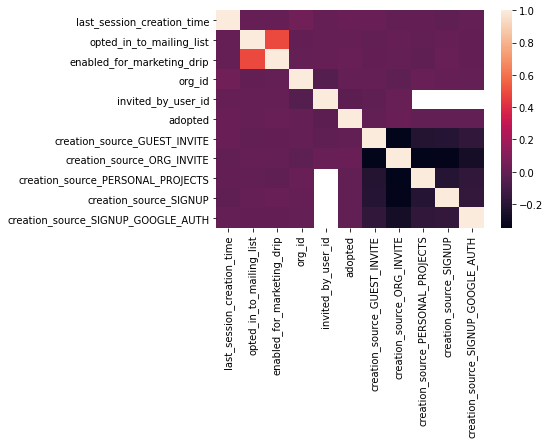

In [30]:
sns.heatmap(dummy.corr())

The pearson correlation did not reveal any one feature in particular that could best predict the 'adopted user'.

### Fill null values with zero

In [40]:
dummy = dummy.fillna(0)

### MLP Model

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [42]:
X = dummy.drop(columns='adopted')
y = dummy.adopted.values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9996

Using an MLP model, we are able to predict with 99.96% accuracy when a user will be an adopted user.

We should investigate how to fill the null values a little more if we wanted to preserve some of the database's authenticity. The heatmap does a fine job depicting how each feature is moderately correlated to the independent variable, which is the status of adopted user or not. 